In [1]:
import os
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, cache=True)

In [3]:
# Convert mnist.data to integers
mnist.data = mnist.data.astype(int)

# Convert mnist.target to integers
mnist.target = mnist.target.astype(int)

# Verify the shape of the data and target
print("Data shape:", mnist.data.shape)
print("Target shape:", mnist.target.shape)

# Optionally, check the first few records
print("First few records of data:", mnist.data[:5])
print("First few target values:", mnist.target[:5])
print("type(mnist.target[1]): " + str(type(mnist.target[1])))

# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Data shape: (70000, 784)
Target shape: (70000,)
First few records of data: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
First few target values: [5 0 4 1 9]
type(mnist.target[1]): <class 'numpy.int32'>
Current Working Directory: c:\Users\AJ24032\Documents\Mauricio\_GitHub\MNIST-Digit-Prediction


In [4]:
""" Model Training Section """
# Set the printing options for numpy arrays
np.set_printoptions(precision=4, suppress=True)

# Create a subset of the first 1000 images
dataset = np.array(mnist.data[:1000], dtype=int) / 255.0  # Normalize the data
print("Dataset shape: " + str(dataset.shape))

target = mnist.target[:1000].astype(int) # (1, 1000)
print("Target shape: " + str(target.shape))
print("Target[:5]: " + str(target[:5]))
print("Target[5] type: " + str(type(target[5])))

hidden_layer_size = 128
np.random.seed(2)
weights_0_1 = np.random.randn(784, hidden_layer_size) * 0.01  # Small random numbers
print("weights_0_1 shape: " + str(weights_0_1.shape))
weights_1_2 = np.random.randn(hidden_layer_size, 10) * 0.01  # Small random numbers
print("weights_1_2 shape: " + str(weights_1_2.shape))

def relu(x):
    return np.maximum(0, x)

def relu2deriv(output):
    return output > 0

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability improvement
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

outputs = 10
alpha = 0.01

def prediction_target_calculation(target):  # Converts target (70000, 1) into a matrix with shape of (70000, 10)
    prediction_target = np.zeros((target.shape[0], outputs))
    for iteration in range(target.shape[0]):
        prediction_target[iteration][int(target[iteration])] = 1
    return prediction_target

goal_prediction = prediction_target_calculation(target=target)
print("goal_prediction[:5]: " + str(goal_prediction[:5]))
print("goal_prediction Shape: " + str(goal_prediction.shape))

for iteration in range(300):
    layer_2_error = 0
    for row_index in range(len(dataset)):
        layer_0 = dataset[row_index:row_index+1]  # (1, 784)
        layer_1 = relu(layer_0.dot(weights_0_1))  # (1, 784).dot((784, 128)) -> (1, 128)
        layer_2 = softmax(layer_1.dot(weights_1_2))  # (1, 128).dot(128, 10) -> (1, 10)

        if (iteration % 10 == 0 and row_index % 10 == 0):
            print("\n")
            print("layer_2[" + str(iteration) + "]: " + str(layer_2))
            print("target[" + str(iteration) + "]: " + str(target[row_index:row_index+1]))
            print("goal_prediction[" + str(iteration) + "]: " + str(goal_prediction[row_index:row_index+1]))

        # Cross-entropy loss
        layer_2_error += -np.sum(goal_prediction[row_index:row_index+1] * np.log(layer_2))

        layer_2_delta = layer_2 - goal_prediction[row_index:row_index+1]  # (1, 10) - (1, 10) -> (1, 10)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)  # (1, 10).dot((10, 128)) * relu2deriv(layer_1) -> (1, 128)

        weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)  # (128, 1).dot(1, 10) -> (128, 10)
        weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)  # (784, 1).dot(1, 128) -> (784, 128)

    if iteration % 10 == 0:
        print("Error[" + str(iteration) + "]: " + str(layer_2_error))

formatted_error = f"{layer_2_error:.4f}".replace('.', '-')
np.savetxt(f"weights_0_1_iter{iteration}_err{formatted_error}.csv", weights_0_1, delimiter=",")
np.savetxt(f"weights_1_2_iter{iteration}_err{formatted_error}.csv", weights_1_2, delimiter=",")
print(f"weights_0_1_iter{iteration}_err{formatted_error}.csv")
print(f"weights_1_2_iter{iteration}_err{formatted_error}.csv")

Dataset shape: (1000, 784)
Target shape: (1000,)
Target[:5]: [5 0 4 1 9]
Target[5] type: <class 'numpy.int32'>
weights_0_1 shape: (784, 128)
weights_1_2 shape: (128, 10)
goal_prediction[:5]: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
goal_prediction Shape: (1000, 10)


layer_2[0]: [[0.0999 0.0994 0.0989 0.1008 0.0998 0.0992 0.1005 0.1015 0.0997 0.1002]]
target[0]: [5]
goal_prediction[0]: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


layer_2[0]: [[0.0989 0.1005 0.0994 0.1007 0.1001 0.0998 0.0998 0.1012 0.0989 0.1006]]
target[0]: [3]
goal_prediction[0]: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


layer_2[0]: [[0.1    0.0995 0.0996 0.1021 0.1006 0.0993 0.1005 0.0993 0.1001 0.099 ]]
target[0]: [4]
goal_prediction[0]: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


layer_2[0]: [[0.0993 0.0997 0.1008 0.1023 0.1011 0.0989 0.0992 0.0994 0.0985 0.1008]]
target[0]: [3]
goal_prediction[0]: [[0. 0. 0. 1. 0

In [5]:
""" Select Weights to be used in the tests """
name_weights_0_1 = "weights_0_1_iter299_err0-3232.csv"
name_weights_1_2 = "weights_1_2_iter299_err0-3232.csv"

In [6]:
""" Test Batch of Images / Accuracy Measurement """
# Set the printing options for numpy arrays
np.set_printoptions(precision=4, suppress=True)

test_offset = 0
test_size = 70000

target = np.array(mnist.target[test_offset : test_offset+test_size].astype(int)) # (1, 1000)

# Create a subset of the first 1000 images
test_data = np.array(mnist.data[test_offset : test_offset+test_size], dtype=int) / 255
print("test_data shape: " + str(test_data.shape))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability improvement
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

weights_0_1 = np.loadtxt(current_directory + "\\" + name_weights_0_1, delimiter=",")
weights_1_2 = np.loadtxt(current_directory + "\\" + name_weights_1_2, delimiter=",")

def relu(x):
    return (x > 1) * x

# Testing loop
test_predictions = []
for i in range(test_size):
    layer_0 = test_data[i:i+1]  # Directly use the index i without adding test_offset
    layer_1 = relu(layer_0.dot(weights_0_1))
    layer_2 = softmax(layer_1.dot(weights_1_2))

    predicted_class = np.argmax(layer_2)
    print(f"Predicted class: {predicted_class}")
    test_predictions.append(predicted_class)

correct_answer = target  # No need to slice again since target is already the correct size
print(f"test_predictions: {test_predictions}")
print(f"Correct Answer: {correct_answer}")

correctly_predicted = 0
for i in range(len(test_predictions)):
    if (test_predictions[i] == correct_answer[i]):
        correctly_predicted += 1
        
model_accuracy = correctly_predicted / len(test_predictions) * 100
print(f"- Model Accuracy: {model_accuracy}")

test_data shape: (70000, 784)
Predicted class: 5
Predicted class: 0
Predicted class: 4
Predicted class: 1
Predicted class: 9
Predicted class: 2
Predicted class: 1
Predicted class: 3
Predicted class: 1
Predicted class: 4
Predicted class: 3
Predicted class: 5
Predicted class: 3
Predicted class: 6
Predicted class: 1
Predicted class: 7
Predicted class: 2
Predicted class: 8
Predicted class: 6
Predicted class: 9
Predicted class: 4
Predicted class: 0
Predicted class: 9
Predicted class: 1
Predicted class: 1
Predicted class: 2
Predicted class: 4
Predicted class: 3
Predicted class: 2
Predicted class: 7
Predicted class: 3
Predicted class: 8
Predicted class: 6
Predicted class: 9
Predicted class: 0
Predicted class: 5
Predicted class: 6
Predicted class: 0
Predicted class: 7
Predicted class: 6
Predicted class: 1
Predicted class: 8
Predicted class: 7
Predicted class: 9
Predicted class: 3
Predicted class: 9
Predicted class: 8
Predicted class: 5
Predicted class: 9
Predicted class: 3
Predicted class: 3
P

test_data shape: (1, 784)
test_index: 15013, 
output: [[0.     0.     0.1202 0.     0.     0.     0.     0.     0.8797 0.0001]], 
Predicted: 8, 
Correct Answer: 2
- Prediction was Incorrect.


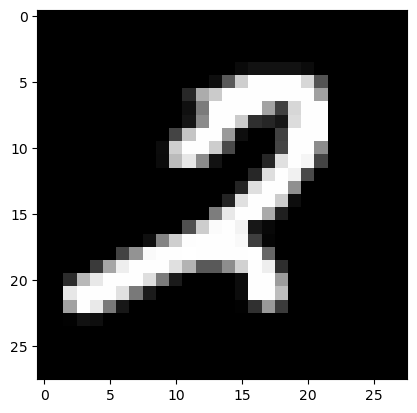

In [7]:
""" Test 1 Image """
# Set the printing options for numpy arrays
np.set_printoptions(precision=4, suppress=True)

test_index = 15013

target = np.array(mnist.target[:].astype(int)) # (1, 1000)

# Create a subset of the first 1000 images
test_data = np.array(mnist.data[test_index], dtype=int) / 255
test_data = test_data.reshape(1, -1)  # Ensure test_data is 2D with shape (1, 784)
print("test_data shape: " + str(test_data.shape))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability improvement
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

weights_0_1 = np.loadtxt(current_directory + "\\" + name_weights_0_1, delimiter=",")
weights_1_2 = np.loadtxt(current_directory + "\\" + name_weights_1_2, delimiter=",")

def relu(x):
    return (x > 1) * x

# Testing loop
layer_0 = test_data
layer_1 = relu(layer_0.dot(weights_0_1))
layer_2 = softmax(layer_1.dot(weights_1_2))

predicted = np.argmax(layer_2)
correct = target[test_index]
print(f"test_index: {test_index}, \noutput: {layer_2}, \nPredicted: {predicted}, \nCorrect Answer: {correct}")
if (predicted == correct):
    print("- Prediction was Correct.")
else:
    print("- Prediction was Incorrect.")

# Take the nth image (indexed at n-1) from the training set,
# reshape from (784, ) to (28, 28) to have a valid shape for displaying purposes.
mnist_image = mnist.data[test_index].reshape(28, 28)
# Set the color mapping to grayscale to have a black background.
plt.imshow(mnist_image, cmap="gray")
# Display the image.
plt.show()